In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import glob
glob.glob('/raid/rustam/danil/beams_test/beams_gan_train/')

['/raid/rustam/danil/beams_test/beams_gan_train/']

In [3]:
exp_name = 'beams_gan_train'
epoch_i = 18
model = tf.saved_model.load(f'/raid/rustam/danil/beams_test/{exp_name}/ep_{epoch_i}/models/i_2999_ep_{epoch_i}')

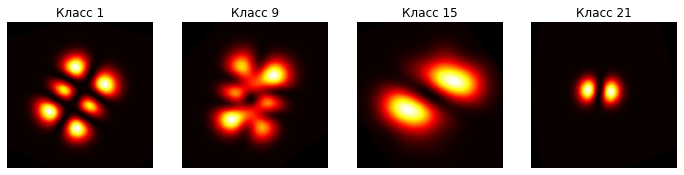

In [6]:
# Generate all images
N_GENERATE = 4
noise_dim = 100

generated_images = []

for class_i in [0, 8, 14, 20]:
    random_latent_vectors = np.random.normal(size=(1, noise_dim)).astype(np.float32)
    gen_img = model(np.array([[class_i]], dtype=np.int32), random_latent_vectors)[0]
    # scale from [-1,1] to [0,1]
    gen_img = (gen_img + 1) / 2.0
    gen_img = np.clip(gen_img * 255.0, 0, 255).astype(np.uint8)
    generated_images.append(gen_img)

fig = plt.figure(figsize=(12, 12))

ax = plt.subplot(141)
ax.set_title('Класс 1')
ax.axis('off')
plt.imshow(generated_images[0])

ax = plt.subplot(142)
ax.set_title('Класс 9')
ax.axis('off')
plt.imshow(generated_images[1])

ax = plt.subplot(143)
ax.set_title('Класс 15')
ax.axis('off')
plt.imshow(generated_images[2])

ax = plt.subplot(144)
ax.set_title('Класс 21')
ax.axis('off')
plt.imshow(generated_images[3])


plt.show()
name_file = '-'.join(exp_name.split('/'))
fig.savefig(f'{name_file}.svg')
plt.close(fig)

In [21]:

from utils import (load_data, CLASSIFICATION, REGRESSION, save_conf_matrix, 
                  TRAIN, TEST, MakiKFoldBalance, foldername2class)

TRAIN_PATH = '../../../double_modes'

# At start of each experiments - create new dataset (shuffle it)
Xtrain, Ytrain, Xtest, Ytest, pred2params, config_data = load_data(
    path_exp_folder='./',
    path_to_data=TRAIN_PATH,
    use_saved=False,
    size_hw=(128, 128),
    test_percent=0.0,
    data_type=CLASSIFICATION
)
Ytrain = np.asarray(Ytrain).astype(np.int32)
Ytest = np.asarray(Ytest).astype(np.int32)

50it [00:00, 260.11it/s]
0it [00:00, ?it/s]

Generate new data...
21


50it [00:00, 259.24it/s]
50it [00:00, 259.76it/s]
50it [00:00, 260.09it/s]
50it [00:00, 259.61it/s]
50it [00:00, 259.21it/s]
50it [00:00, 258.57it/s]
50it [00:00, 258.84it/s]
50it [00:00, 258.25it/s]
50it [00:00, 259.73it/s]
50it [00:00, 262.24it/s]
50it [00:00, 265.62it/s]
50it [00:00, 268.49it/s]
50it [00:00, 270.48it/s]
50it [00:00, 272.96it/s]
50it [00:00, 274.40it/s]
50it [00:00, 277.12it/s]
50it [00:00, 279.30it/s]
50it [00:00, 279.39it/s]
50it [00:00, 279.01it/s]
50it [00:00, 280.40it/s]

train :  1029
test:  21


In [25]:
def get_random_image(Xdata, Ydata, class_to_take):
    Xdata = np.asarray(Xdata)
    Ydata = np.asarray(Ydata)
    x_part = Xdata[Ydata == class_to_take]
    return x_part[int(np.random.randint(low=0, high=len(x_part)))]

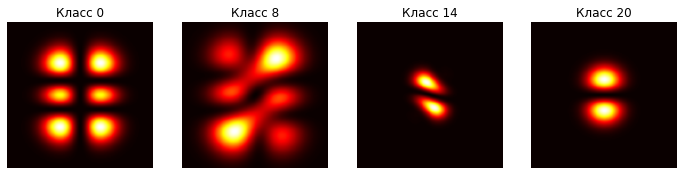

In [41]:

fig = plt.figure(figsize=(12, 12))

ax = plt.subplot(141)
ax.set_title('Класс 0')
ax.axis('off')
plt.imshow(get_random_image(Xtrain, Ytrain, 0))

ax = plt.subplot(142)
ax.set_title('Класс 8')
ax.axis('off')
plt.imshow(get_random_image(Xtrain, Ytrain, 8))

ax = plt.subplot(143)
ax.set_title('Класс 14')
ax.axis('off')
plt.imshow(get_random_image(Xtrain, Ytrain, 14))

ax = plt.subplot(144)
ax.set_title('Класс 20')
ax.axis('off')
plt.imshow(get_random_image(Xtrain, Ytrain, 20))


plt.show()
fig.savefig(f'source_images.svg')
plt.close(fig)